# TAXI FARE PREDICTION USING LINEARREGRESSION

In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\ADMIN\Downloads\uber.csv")

In [3]:
data.head(2)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1


In [4]:
data.tail(2)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [5]:
data.shape

(200000, 9)

In [6]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean(),inplace=True)
data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean(),inplace=True)

In [10]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
data['pickup_datetime'] =  pd.to_datetime(data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [12]:
data['Year'] = data['pickup_datetime'].dt.year
data['Month'] = data['pickup_datetime'].dt.month
data['Date'] = data['pickup_datetime'].dt.day
data['Day'] = data['pickup_datetime'].dt.dayofweek
data['Hour'] = data['pickup_datetime'].dt.hour
data['Minute'] = data['pickup_datetime'].dt.minute

In [13]:
data.head(8)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,45
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,22
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,47
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,12,5,2,27
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00,-73.961447,40.693965,-73.871195,40.774297,5,2014,10,12,6,7,4
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00,0.000000,0.000000,0.000000,0.000000,1,2012,12,11,1,13,52


In [14]:
data.dtypes

Unnamed: 0                    int64
key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [15]:
data1=data.drop(['key','Unnamed: 0'],axis=1)

In [16]:
data1.head(6)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52
1,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4
2,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,45
3,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,22
4,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,3,17,47
5,4.9,2011-02-12 02:27:09,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,12,5,2,27


In [17]:
data1.groupby(['passenger_count']).count()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Year,Month,Date,Day,Hour,Minute
passenger_count,,,,,,,,,,,,
0,709,709,709,709,709,709,709,709,709,709,709,709
1,138425,138425,138425,138425,138425,138425,138425,138425,138425,138425,138425,138425
2,29428,29428,29428,29428,29428,29428,29428,29428,29428,29428,29428,29428
3,8881,8881,8881,8881,8881,8881,8881,8881,8881,8881,8881,8881
4,4276,4276,4276,4276,4276,4276,4276,4276,4276,4276,4276,4276
5,14009,14009,14009,14009,14009,14009,14009,14009,14009,14009,14009,14009
6,4271,4271,4271,4271,4271,4271,4271,4271,4271,4271,4271,4271
208,1,1,1,1,1,1,1,1,1,1,1,1


In [18]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement haversine (from versions: none)
ERROR: No matching distribution found for haversine


In [19]:
def hav_dist(lat1, lon1, lat2, lon2):
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    a = (np.sin(dLat / 2) ** 2 + np.sin(dLon / 2) ** 2 * np.cos(lat1) * np.cos(lat2))
    rad = 6371  # Earth's radius in kilometers
    c = 2 * np.arcsin(np.sqrt(a))
    
    distance = rad * c
    return distance

In [20]:
data1['distance'] = hav_dist(data1['pickup_latitude'],data1['pickup_longitude'],data1['dropoff_latitude'],data1['dropoff_longitude'])

In [21]:
data1['fare_amount'].min()

-52.0

In [22]:
data1['fare_amount'].max()

499.0

In [23]:
data1=data1.drop(data1[data1['fare_amount']<2.5].index, axis=0)
data1=data1.drop(data1[data1['fare_amount']>350].index, axis=0)

In [24]:
data1['distance'].min()

0.0

In [25]:
data1['distance'].max()

16409.239135313182

In [26]:
data1 = data1.drop(data1[data1['distance']== 0].index, axis=0)
data1 = data1.drop(data1[data1['distance'] > 40 ].index, axis=0)
data1 = data1.drop(data1[data1['passenger_count'] > 6 ].index, axis=0)
data1 = data1.drop(data1[data1['passenger_count'] ==0 ].index, axis=0)
data1 = data1.drop(data1[data1['passenger_count'] ==0.12 ].index, axis=0)

In [27]:
data1 = data1.drop(data1[data1['pickup_datetime'].isnull()].index, axis=0)
data1=data1.drop(data1[data1["fare_amount"].isnull()].index, axis=0)

In [28]:
data1 = data1.drop((data1[data1['pickup_latitude']<-90]).index, axis=0)
data1 = data1.drop((data1[data1['pickup_latitude']>90]).index, axis=0)

In [29]:
df=pd.DataFrame(data1[['passenger_count','distance',
       'Year', 'Month', 'Date', 'Day', 'Hour', 'Minute','fare_amount']])

In [30]:
df.head(5)

,passenger_count,distance,Year,Month,Date,Day,Hour,Minute,fare_amount
0,1,1.683323,2015,5,7,3,19,52,7.5
1,1,2.457590,2009,7,17,4,20,4,7.7
2,1,5.036377,2009,8,24,0,21,45,12.9
3,3,1.661683,2009,6,26,4,8,22,5.3
4,5,4.475450,2014,8,28,3,17,47,16.0


<Axes: >

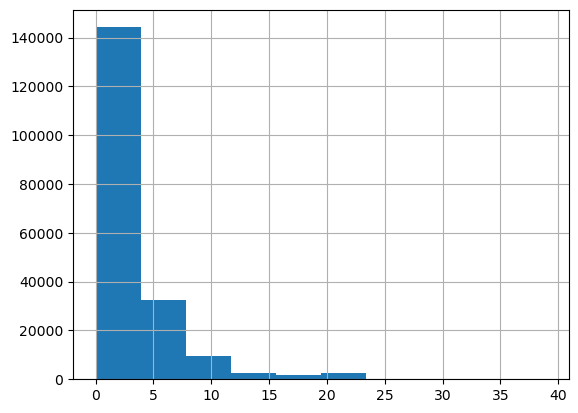

In [31]:
df['distance'].hist()

<Axes: xlabel='passenger_count', ylabel='count'>

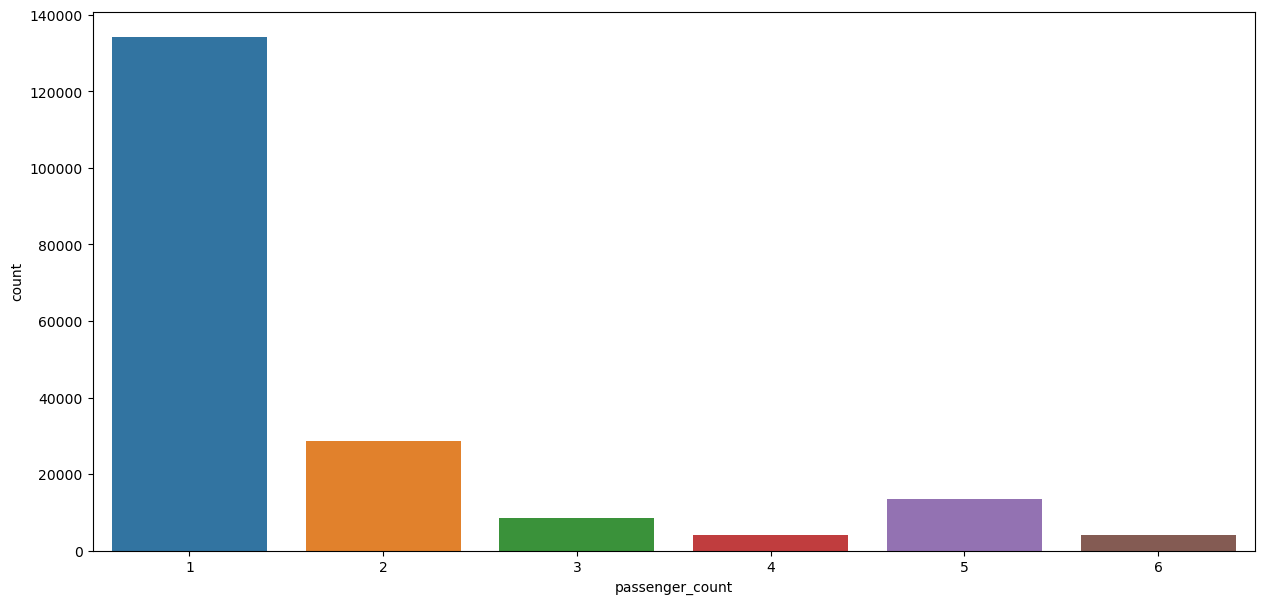

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=df)

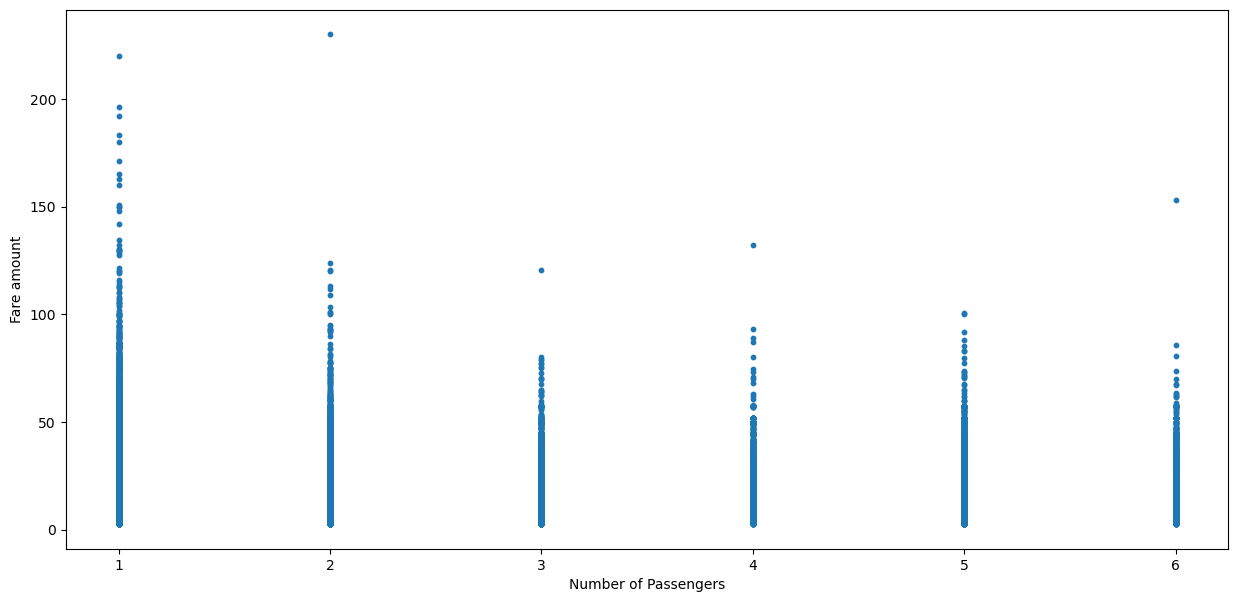

In [33]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['passenger_count'], y=df['fare_amount'], s=10)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare amount')
plt.show()

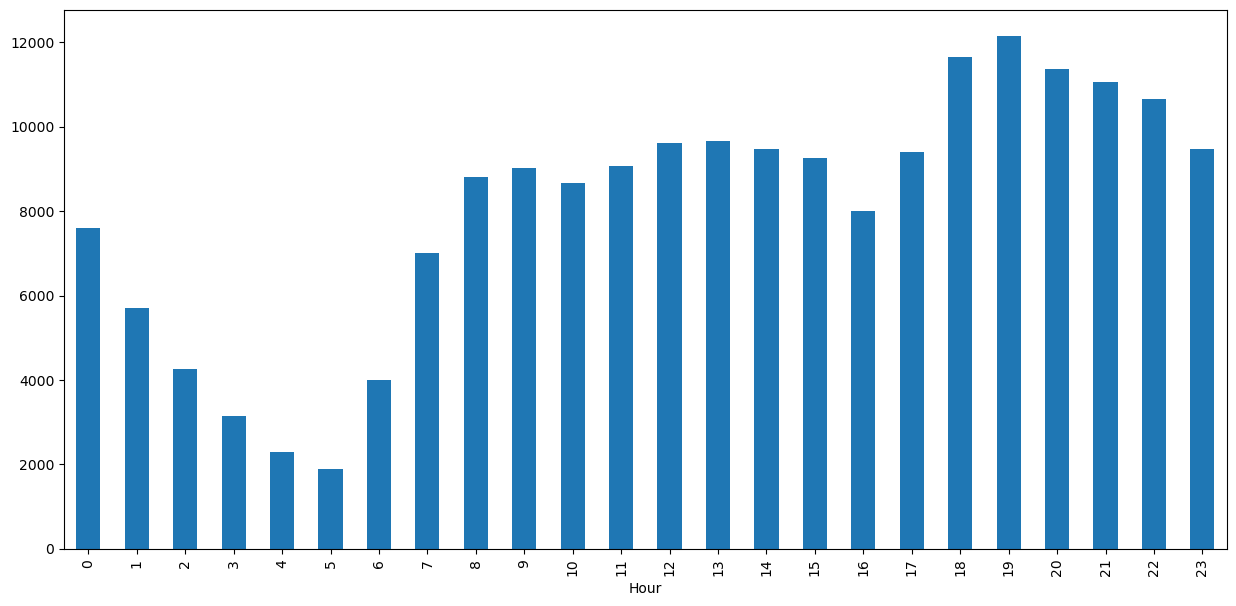

In [34]:
plt.figure(figsize=(15,7))
df.groupby(df['Hour'])['Hour'].count().plot(kind="bar")
plt.show()

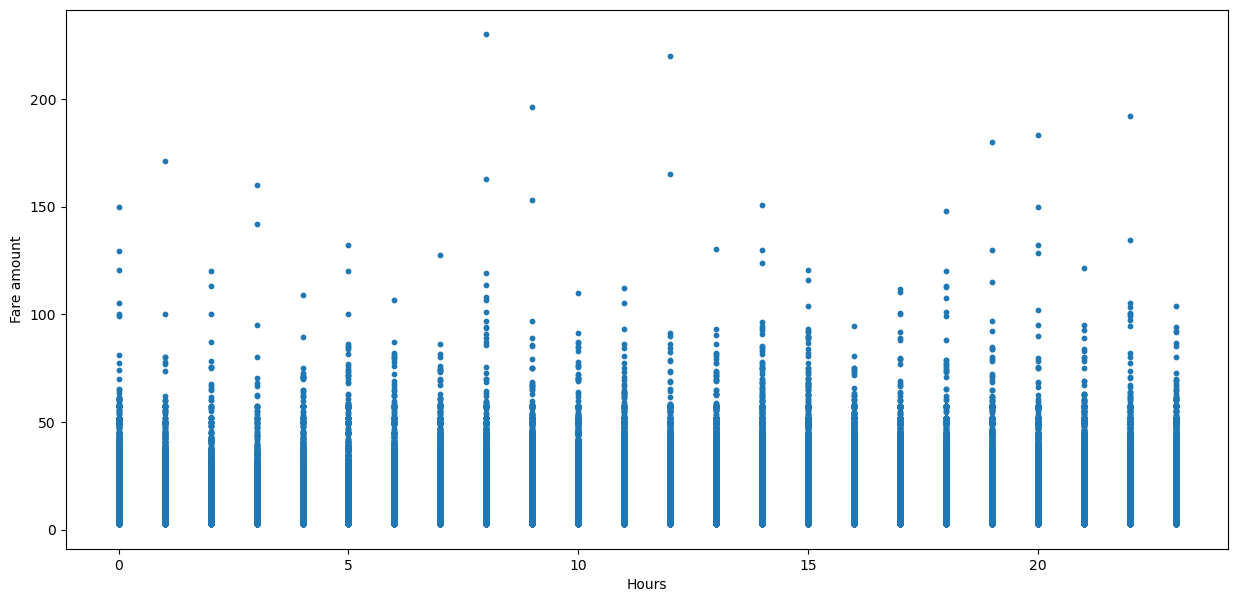

In [35]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Hour'], y=df['fare_amount'],s=10)
plt.xlabel('Hours')
plt.ylabel('Fare amount')
plt.show()

<Axes: xlabel='Day', ylabel='count'>

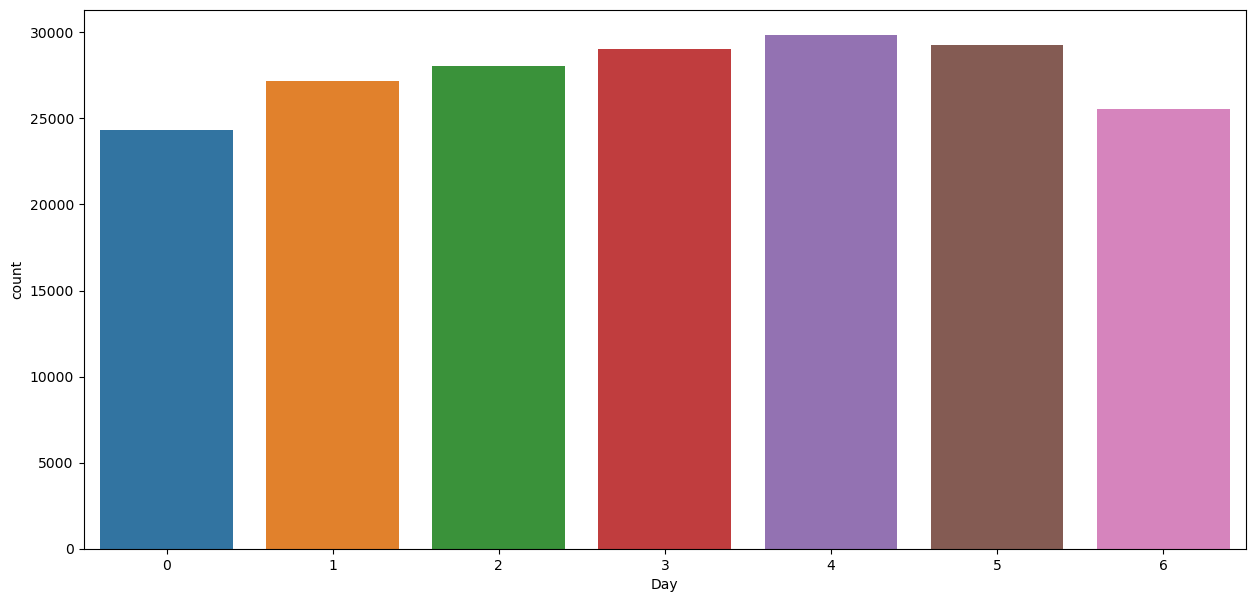

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(x='Day',data=df)
#costlt on 

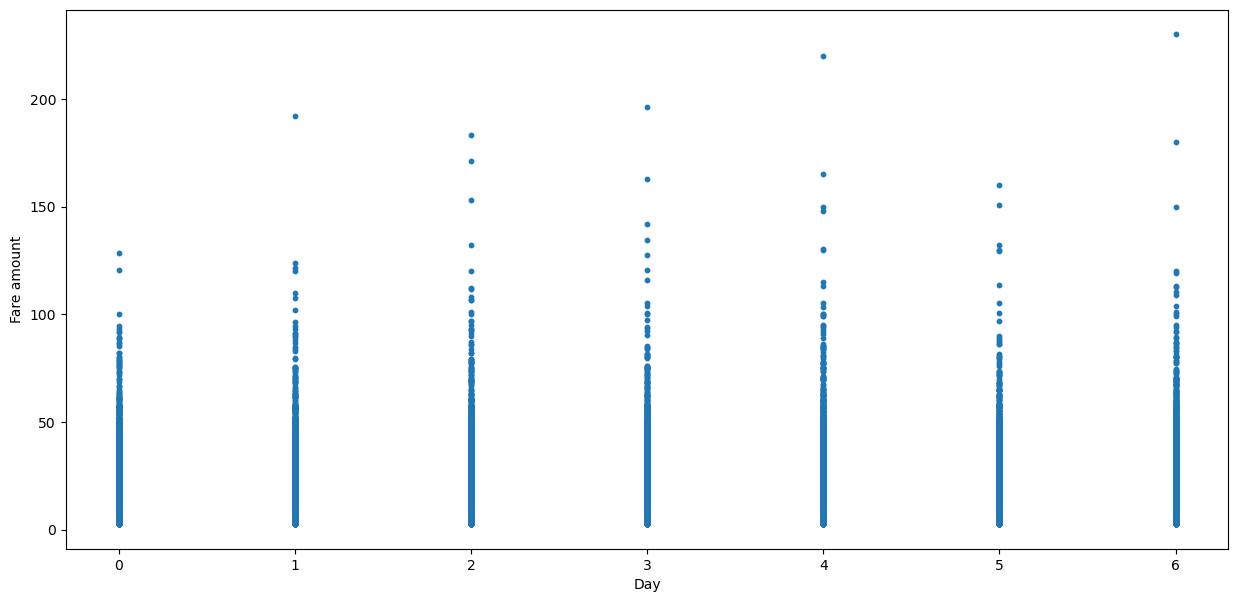

In [37]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Day'], y=df['fare_amount'],s=10)
plt.xlabel('Day')
plt.ylabel('Fare amount')
plt.show()
#high fare on  saturday and thursday low fare on tuesday

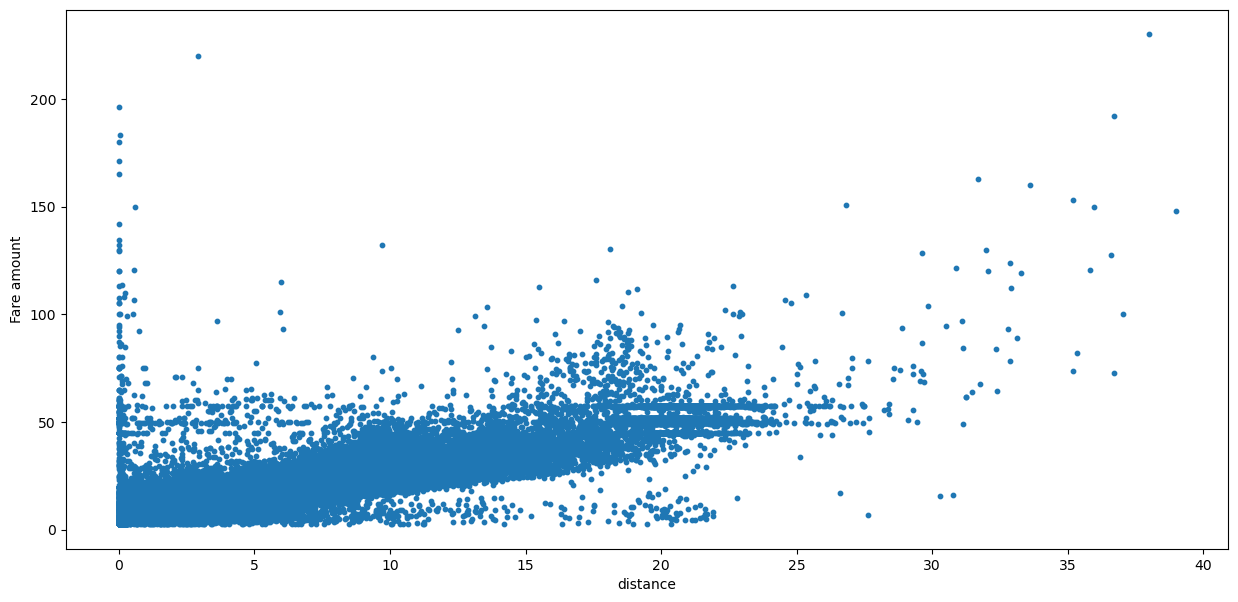

In [38]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['distance'], y=df['fare_amount'],s=10)
plt.xlabel('distance')
plt.ylabel('Fare amount')
plt.show()

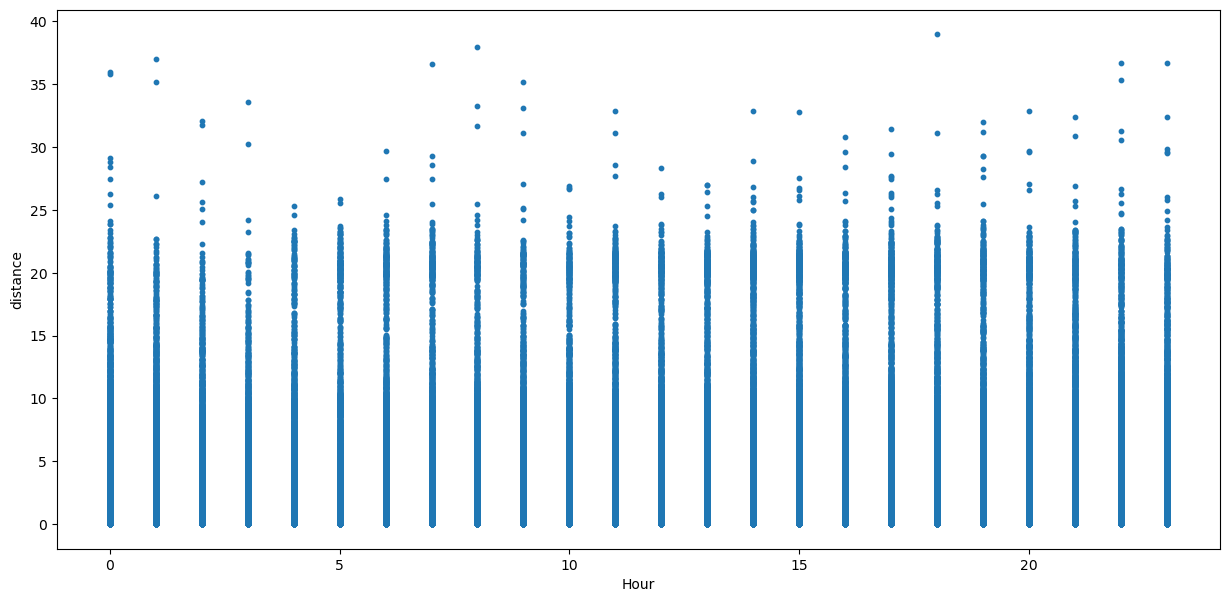

In [39]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Hour'], y=df['distance'],s=10)
plt.xlabel('Hour')
plt.ylabel('distance')
plt.show()
#7 am to 11pm hours travelling more distance

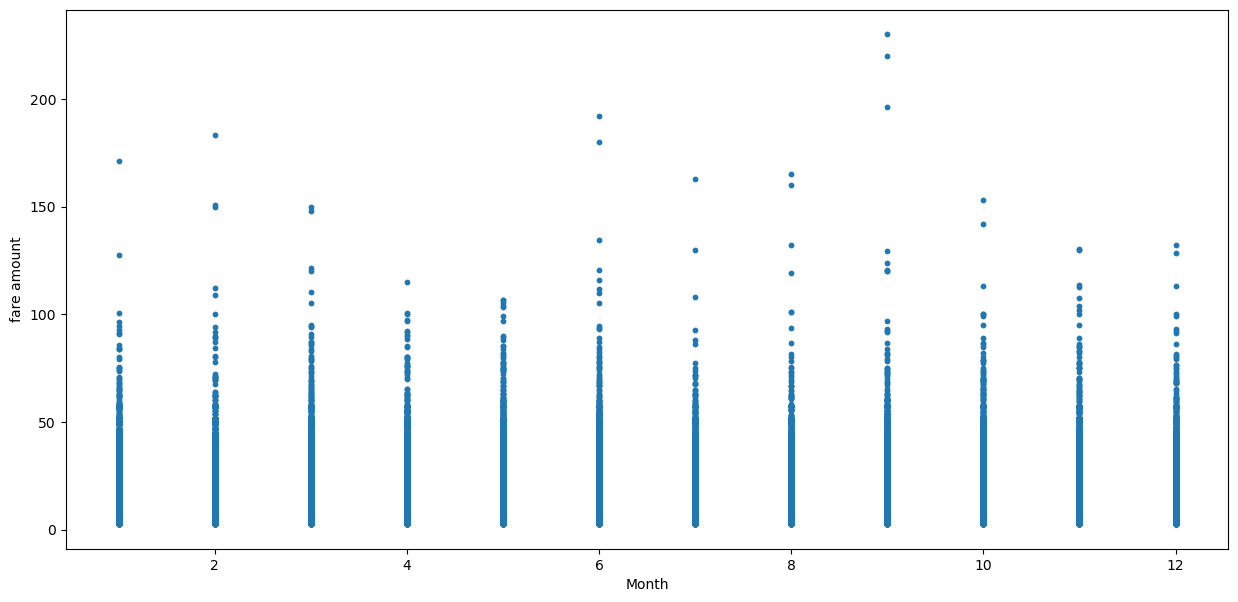

In [40]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Month'], y=df['fare_amount'],s=10)
plt.xlabel('Month')
plt.ylabel('fare amount')
plt.show()
#fare amount is high in month of june and september

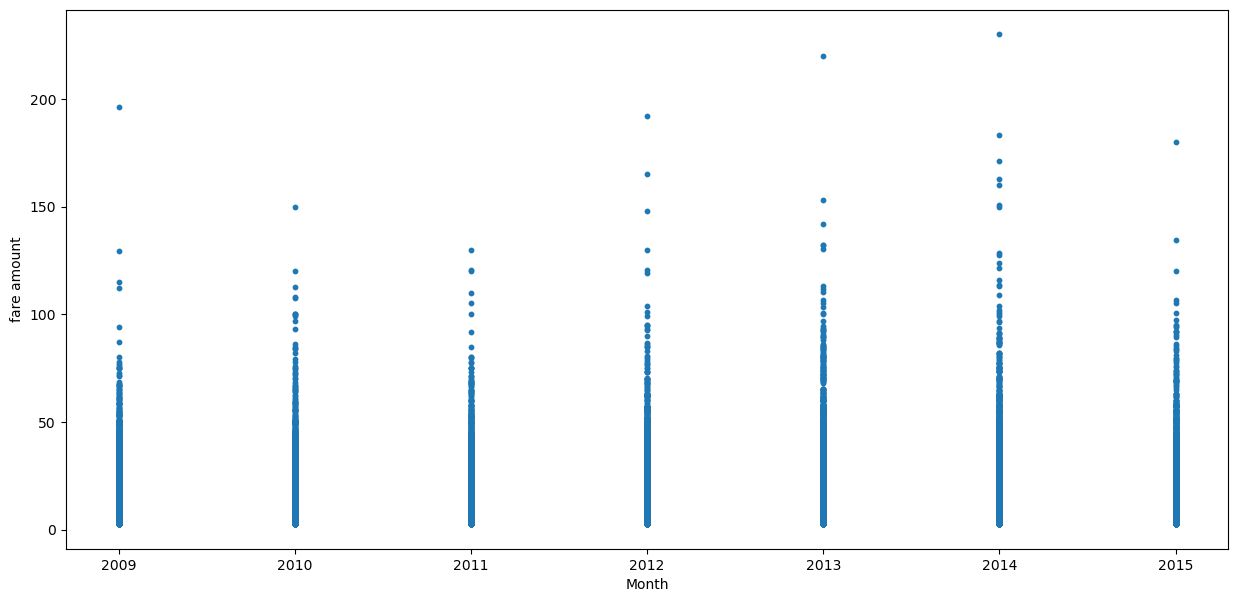

In [41]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Year'], y=df['fare_amount'],s=10)
plt.xlabel('Month')
plt.ylabel('fare amount')
plt.show()

In [42]:
x=df.drop(['fare_amount'],axis=1)

In [43]:
x.head(4)

,passenger_count,distance,Year,Month,Date,Day,Hour,Minute
0,1,1.683323,2015,5,7,3,19,52
1,1,2.457590,2009,7,17,4,20,4
2,1,5.036377,2009,8,24,0,21,45
3,3,1.661683,2009,6,26,4,8,22


In [44]:
y=df['fare_amount']

In [45]:
y.head(4)

0     7.5
1     7.7
2    12.9
3     5.3
Name: fare_amount, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)

In [48]:
x_train.shape

(129413, 8)

In [49]:
y_test.shape

(63742,)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
r=LinearRegression()

In [52]:
reg=r.fit(x_train,y_train)

In [53]:
y_pred=r.predict(x_test)

In [54]:
y_pred

array([ 5.69859876,  7.43786145, 15.01062151, ...,  8.23906079,
        9.36161735,  7.57025156])

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.768558145568826